In [3]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset
df = pd.read_excel(r"C:\Users\luish\OneDrive\Área de Trabalho\Cap 01 Asset_PBL_Perfil_Clientes_Top_ECommerce.xlsx")

# Verificando se há valores faltantes
missing_values = df.isnull().sum()
print("Valores faltantes por coluna:\n", missing_values)

Valores faltantes por coluna:
 Região País               0
Estado                    0
Data                      0
FormaPagto                0
Sexo Informado Cliente    0
Idade                     0
valor ticket médio        0
numero pedido             0
dtype: int64


In [4]:
# Identificando outliers na coluna Idade e seus respectivos ticket médios
q1 = df['Idade'].quantile(0.25)
q3 = df['Idade'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Idade'] < lower_bound) | (df['Idade'] > upper_bound)]
print("Outliers na coluna Idade:\n", outliers[['Idade', 'valor ticket médio']])

Outliers na coluna Idade:
        Idade  valor ticket médio
9525     244                -345
9546     345                 -22
9805     455                -987
10246    289                -542
10708    431                -341
12422    572                -872
13494    763                   0
14475    987                   0
15680    233                   0
16409    433                  -2
17060    874                 -76
18054    900                  32


In [15]:
# Remover valores negativos na coluna 'valor ticket médio'
df_sem_negativos = df[df['valor ticket médio'] >= 0]

# Calcular a média do valor ticket médio
media_ticket_medio = df_sem_negativos['valor ticket médio'].mean()

# Exibir a média
print(f'A média do valor ticket médio (sem valores negativos) é: {media_ticket_medio:.2f}')


A média do valor ticket médio (sem valores negativos) é: 236.94


In [20]:
import pandas as pd

# Remover valores negativos do ticket médio (caso haja)
df = df[df['valor ticket médio'] >= 0]

# Calcular o valor máximo do ticket médio no DataFrame
max_ticket_medio = df['valor ticket médio'].max()

# Definir as faixas de ticket médio até o valor máximo encontrado
faixas = list(range(0, max_ticket_medio + 51, 50))  # Incremento de 50 até o máximo + 50

# Criar rótulos para as faixas (baseado no valor máximo encontrado)
labels = [f'{faixas[i]}-{faixas[i+1]-1}' for i in range(len(faixas)-1)]

# Contar a quantidade de valores em cada faixa de ticket médio
contagem_por_faixa = pd.cut(df['valor ticket médio'], bins=faixas, labels=labels, right=False).value_counts().sort_index()

# Exibir a contagem por faixa de ticket médio em formato tabular
print('\nContagem de Clientes por Faixa de Ticket Médio:')
print(contagem_por_faixa)



Contagem de Clientes por Faixa de Ticket Médio:
valor ticket médio
0-49        2855
50-99       5038
100-149    10117
150-199     8495
200-249     3815
250-299     2559
300-349     3257
350-399     3213
400-449     3378
450-499     1359
500-549      960
550-599      985
600-649      969
650-699      812
Name: count, dtype: int64


C:\Users\luish\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\luish\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


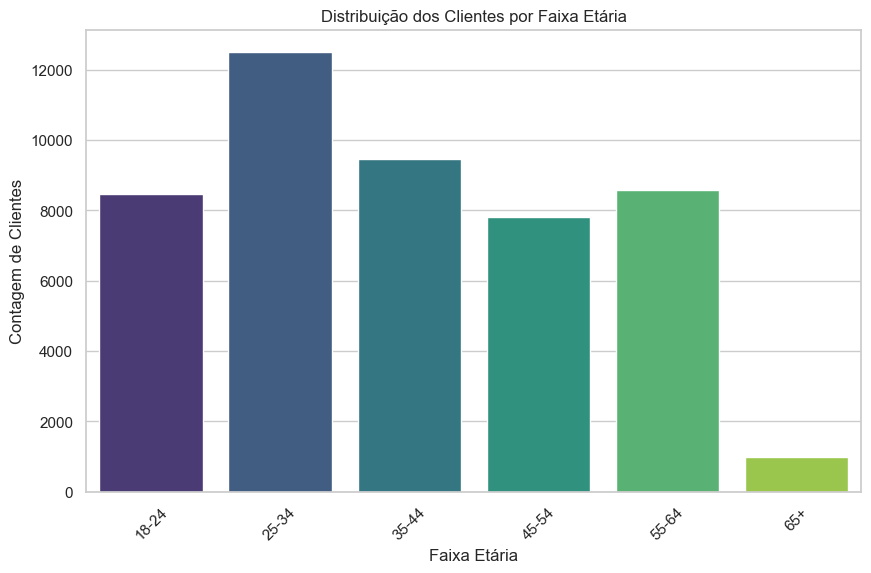

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo novas faixas etárias
bins = [18, 25, 35, 45, 55, 65, 150]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Criando coluna com faixas de idade
df['Faixa Etária'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=False)

# Gráfico do perfil de cliente por faixa etária
plt.figure(figsize=(10, 6))
sns.countplot(x='Faixa Etária', data=df, palette='viridis')
plt.title('Distribuição dos Clientes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem de Clientes')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()


In [25]:
import pandas as pd

# Suponha que você já tenha carregado seu DataFrame, vamos chamar de df

# Função para remover outliers da coluna de idade usando IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_clean

# Remover outliers da coluna 'Idade'
df_clean = remove_outliers(df, 'Idade')

# Verificar estatísticas básicas após a limpeza de outliers
print("Estatísticas básicas de ticket medio após a limpeza de outliers em idade:")
print(df_clean['valor ticket médio'].describe())

Estatísticas básicas de ticket medio após a limpeza de outliers em idade:
count    47808.000000
mean       236.955635
std        157.851935
min          0.000000
25%        118.000000
50%        183.000000
75%        346.000000
max        690.000000
Name: valor ticket médio, dtype: float64


In [26]:
# Definindo faixas etárias
bins = [18, 25, 35, 45, 55, 65, 150]  # Considerando "mais de 65 anos" como a última faixa
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Criando coluna com faixas de idade
df_clean['Faixa Etária'] = pd.cut(df_clean['Idade'], bins=bins, labels=labels, right=False)

# Calculando o valor do ticket médio por faixa etária
valor_ticket_medio_faixa_etaria = df_clean.groupby('Faixa Etária')['valor ticket médio'].mean()

print("\nValor do Ticket Médio por Faixa Etária:")
print(valor_ticket_medio_faixa_etaria)



Valor do Ticket Médio por Faixa Etária:
Faixa Etária
18-24     67.490184
25-34    170.556666
35-44    356.403997
45-54    490.231832
55-64    153.301118
65+      106.955010
Name: valor ticket médio, dtype: float64


C:\Users\luish\AppData\Local\Temp\ipykernel_23256\1757595246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Faixa Etária'] = pd.cut(df_clean['Idade'], bins=bins, labels=labels, right=False)
C:\Users\luish\AppData\Local\Temp\ipykernel_23256\1757595246.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valor_ticket_medio_faixa_etaria = df_clean.groupby('Faixa Etária')['valor ticket médio'].mean()


In [27]:
# Calculando idade média dos clientes selecionados
idade_media = df_clean['Idade'].mean()

print(f"\nIdade Média dos Clientes Selecionados: {idade_media:.2f} anos")



Idade Média dos Clientes Selecionados: 39.36 anos


In [28]:
# Calculando variância da idade
variancia_idade = df_clean['Idade'].var()

print(f"\nVariância da Idade: {variancia_idade:.2f}")



Variância da Idade: 195.29


In [29]:
# Calculando desvio padrão da idade
desvio_padrao_idade = df_clean['Idade'].std()

print(f"\nDesvio Padrão da Idade: {desvio_padrao_idade:.2f}")



Desvio Padrão da Idade: 13.97


In [30]:
# Calculando valor médio e mediana por faixa etária
valor_medio_faixa_etaria = df_clean.groupby('Faixa Etária')['valor ticket médio'].mean()
mediana_faixa_etaria = df_clean.groupby('Faixa Etária')['valor ticket médio'].median()

print("\nValor Médio por Faixa Etária:")
print(valor_medio_faixa_etaria)

print("\nMediana por Faixa Etária:")
print(mediana_faixa_etaria)



Valor Médio por Faixa Etária:
Faixa Etária
18-24     67.490184
25-34    170.556666
35-44    356.403997
45-54    490.231832
55-64    153.301118
65+      106.955010
Name: valor ticket médio, dtype: float64

Mediana por Faixa Etária:
Faixa Etária
18-24     67.0
25-34    170.0
35-44    357.0
45-54    490.0
55-64    153.0
65+      107.0
Name: valor ticket médio, dtype: float64


C:\Users\luish\AppData\Local\Temp\ipykernel_23256\3399812356.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valor_medio_faixa_etaria = df_clean.groupby('Faixa Etária')['valor ticket médio'].mean()
C:\Users\luish\AppData\Local\Temp\ipykernel_23256\3399812356.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mediana_faixa_etaria = df_clean.groupby('Faixa Etária')['valor ticket médio'].median()


In [31]:
# Calculando ranking das vendas por faixa etária
ranking_vendas_faixa_etaria = df_clean.groupby('Faixa Etária')['valor ticket médio'].sum().sort_values(ascending=False)

print("\nRanking das Vendas por Faixa Etária:")
print(ranking_vendas_faixa_etaria)



Ranking das Vendas por Faixa Etária:
Faixa Etária
45-54    3831652
35-44    3370869
25-34    2134005
55-64    1316550
18-24     570697
65+       104602
Name: valor ticket médio, dtype: int64


C:\Users\luish\AppData\Local\Temp\ipykernel_23256\805636623.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ranking_vendas_faixa_etaria = df_clean.groupby('Faixa Etária')['valor ticket médio'].sum().sort_values(ascending=False)
